## Standard Sentiment Analysis

In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# read the tweets and place into dataframe df
df = pd.read_csv("data/tweets.csv")
df[:3]
# df.tail(3)  last 3

id          handle  \
0  780925634159796224  HillaryClinton   
1  780916180899037184  HillaryClinton   
2  780911564857761793  HillaryClinton   

                                                text  is_retweet  \
0  The question in this election: Who can put the...       False   
1  Last night, Donald Trump said not paying taxes...        True   
2  Couldn't be more proud of @HillaryClinton. Her...        True   

  original_author                 time in_reply_to_screen_name  \
0             NaN  2016-09-28T00:22:34                     NaN   
1        timkaine  2016-09-27T23:45:00                     NaN   
2           POTUS  2016-09-27T23:26:40                     NaN   

   in_reply_to_status_id  in_reply_to_user_id  is_quote_status  ...  \
0                    NaN                  NaN            False  ...   
1                    NaN                  NaN            False  ...   
2                    NaN                  NaN            False  ...   

  place_type  place_country_code  place_country  place_contained_within  \
0        NaN                 NaN            NaN                     NaN   
1        NaN                 NaN            NaN                     NaN   
2        NaN                 NaN            NaN                     NaN   

   place_attributes place_bounding_box  \
0               NaN                NaN   
1               NaN                NaN   
2               NaN                NaN   

                                     source_url truncated  \
0                    https://studio.twitter.com     False   
1                            http://twitter.com     False   
2  https://about.twitter.com/products/tweetdeck     False   

                                            entities  \
0  {'media': [{'display_url': 'pic.twitter.com/Xr...   
1  {'media': [{'display_url': 'pic.twitter.com/t0...   
2  {'user_mentions': [{'id_str': '1536791610', 'n...   

                                   extended_entities  
0  {'media': [{'display_url': 'pic.twitter.com/Xr...  
1  {'media': [{'display_url': 'pic.twitter.com/t0...  
2                                                NaN  

[3 rows x 28 columns]

positive, neutral, negative:  [3273, 1348, 1823]


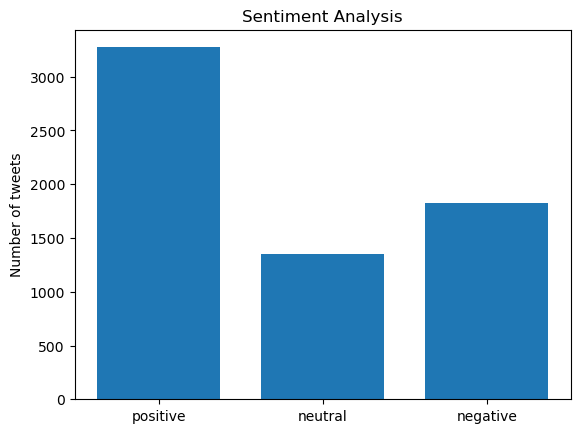

In [5]:
sentiment = SentimentIntensityAnalyzer()

# apply sentiment analysis to the text column in df (tweets) and place the 
# polarity scores in a new column - sentiment. 
df['sentiment'] = df.text.apply(lambda x: sentiment.polarity_scores(x)['compound'])
'''
In the sentiment.polarity_scores function, 'compound' refers to a metric that represents the overall 
sentiment polarity of a piece of text. It is a single value that encapsulates the compound sentiment score, 
taking into account both the positive and negative sentiment expressed in the text.

The compound score is calculated using a combination of sentiment scores for individual words in the text. 
It ranges from -1 to 1, where 1 indicates a highly positive sentiment, -1 indicates a highly negative sentiment, 
and 0 indicates a neutral sentiment.
'''

pos = len(df[df.sentiment > 0]) # count of 'positive' tweets 
neg = len(df[df.sentiment < 0]) # count of 'negative' tweets
neu = len(df[df.sentiment == 0]) # count of 'neutral' tweets

y = [pos, neu, neg]	  # vector of y-values
print("positive, neutral, negative: ", y)

# plot of y
plt.title("Sentiment Analysis")
plt.ylabel('Number of tweets')

# the x-axis, range(len(y) is 0, 1, 2. Label these as 'positive', 'neutral', 'negative' 
plt.xticks(range(len(y)), ['positive', 'neutral', 'negative'])

# plot a bar chart where the y-axis (height) is y, and the x-axis (0, 1, 2) is labelled 'positive', 'neutral', 'negative'
plt.bar(range(len(y)), height=y, width = 0.75, align = 'center', alpha = 1)
plt.show()


In [7]:
df[['text','sentiment']] # show the columns text and sentiment 

text  sentiment
0     The question in this election: Who can put the...     0.4404
1     Last night, Donald Trump said not paying taxes...     0.0000
2     Couldn't be more proud of @HillaryClinton. Her...     0.1850
3     If we stand together, there's nothing we can't...     0.1376
4     Both candidates were asked about how they'd co...    -0.6597
...                                                 ...        ...
6439  "@lilredfrmkokomo: @realDonaldTrump My Faceboo...     0.7405
6440  "@marybnall01: @realDonaldTrump watched lowell...     0.9379
6441  "@ghosthunter_lol: Iowa key endorsement for @r...     0.3802
6442  "@iLoveiDevices: @EdwinRo47796972 @happyjack22...     0.0000
6443  "@SalRiccobono: @realDonaldTrump @troyconway D...     0.7034

[6444 rows x 2 columns]

In [9]:
pd.set_option('display.max_colwidth', None)  # to see the full tweet 
df['text']

0                          The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG
1                          Last night, Donald Trump said not paying taxes was "smart." You know what I call it? Unpatriotic. https://t.co/t0xmBfj7zF
2        Couldn't be more proud of @HillaryClinton. Her vision and command during last night's debate showed that she's ready to be our next @POTUS.
3             If we stand together, there's nothing we can't do. \n\nMake sure you're ready to vote: https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy
4                         Both candidates were asked about how they'd confront racial injustice. Only one had a real answer. https://t.co/sjnEokckis
                                                                            ...                                                                     
6439                                            "@lilredfrmkokomo: @realDonaldTrump My Facebook Groups are

In [7]:
pd.set_option('display.max_colwidth', None)
df[['text','sentiment']]

text  \
0                        The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG   
1                        Last night, Donald Trump said not paying taxes was "smart." You know what I call it? Unpatriotic. https://t.co/t0xmBfj7zF   
2      Couldn't be more proud of @HillaryClinton. Her vision and command during last night's debate showed that she's ready to be our next @POTUS.   
3           If we stand together, there's nothing we can't do. \n\nMake sure you're ready to vote: https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy   
4                       Both candidates were asked about how they'd confront racial injustice. Only one had a real answer. https://t.co/sjnEokckis   
...                                                                                                                                            ...   
6439                                          "@lilredfrmkokomo: @realDonaldTrump My Facebook Groups are all voting TRUMP /4000 people! !!" Great!   
6440                             "@marybnall01: @realDonaldTrump watched lowell mass speech. Awesome. Great crowd. Make America Great Again!!!!!!"   
6441   "@ghosthunter_lol: Iowa key endorsement for @realDonaldTrump Can't wait for the Iowa caucus in 4 weeks! #Trump2016 https://t.co/JBfyFrZfFb"   
6442  "@iLoveiDevices: @EdwinRo47796972 @happyjack225 @FoxNews @krauthammer  Minimizing dependency on China is crucial.Only Trump talks about that   
6443                             "@SalRiccobono: @realDonaldTrump @troyconway Donald get big business back and# MAKE AMERICA GREAT AGAIN FOR 2016"   

      sentiment  
0        0.4404  
1        0.0000  
2        0.1850  
3        0.1376  
4       -0.6597  
...         ...  
6439     0.7405  
6440     0.9379  
6441     0.3802  
6442     0.0000  
6443     0.7034  

[6444 rows x 2 columns]

In [26]:
df[df['sentiment']<0]['text'].tail(50)  # show me the last 50 -ve tweets

6269                                                                        Wow, new polls just out have Trump up and Cruz down - he is a nervous wreck!
6273        Ted Cruz is falling in the polls. He is nervous. People are worried about his place of birth and his failure to report his loans from banks!
6282          Far more killed than anticipated in radical Islamic terror attack yesterday. Get tough and smart U.S., or we won't have a country anymore!
6290    Greatly dishonest of @TedCruz to file a financial disclosure form &amp; not list his lending banks- then pretend he is going to clean up Wall St
6299              The Ted Cruz wiseguy apology to the people of New York is a disgrace. Remember, his wife's employer, and his lender, is located there!
6300               Was there another loan that Ted Cruz FORGOT to file. Goldman Sachs owns him, he will do anything they demand. Not much of a reformer!
6302        Ted Cruz was born in Canada and was a Canadian citizen until 15 months

## Data Cleaning - Tokenisation/Stopwords/Punctuation Removal

In [2]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
import pandas as pd
nltk.download('stopwords')

# read the tweets and place into dataframe df
df = pd.read_csv("data/tweets.csv")

# tokenize - place into column 'tokens'
df['tokens'] = df['text'].apply(TweetTokenizer().tokenize)
# print("tokens:\n", df.tokens.head(10))

# remove stopwords - place into column 'stopwords'
stopwords_vocabulary = stopwords.words('english')
df['stopwords'] = df['tokens'].apply(lambda x: [i for i in x if i.lower() not in stopwords_vocabulary])
# print("\ntokens after removing stopwords:\n", df.stopwords.head(10))

# remove punctuations and place in column 'punctuations'
punctuations = list(string.punctuation)
df['punctuation'] = df['stopwords'].apply(lambda x: [i for i in x if i not in punctuations])
# print("\ntokens after removing punctuations:\n",df.punctuation.head(10))

# remove tokens that begin with a digit
df['digits'] = df['punctuation'].apply(lambda x: [i for i in x if i[0] not in list(string.digits)])
# print("\ntokens after removing those that that begin with a digit:\n",df.digits.head(10))

# keep tweet that contain more than 1 character
df['final'] = df['digits'].apply(lambda x: [i for i in x if len(i) > 1])
# print("\nfinally tokens that are more than 1 character in length:\n",df.final.head(10))

df[['handle', 'text', 'final']]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


handle                                               text  \
0      HillaryClinton  The question in this election: Who can put the...   
1      HillaryClinton  Last night, Donald Trump said not paying taxes...   
2      HillaryClinton  Couldn't be more proud of @HillaryClinton. Her...   
3      HillaryClinton  If we stand together, there's nothing we can't...   
4      HillaryClinton  Both candidates were asked about how they'd co...   
...               ...                                                ...   
6439  realDonaldTrump  "@lilredfrmkokomo: @realDonaldTrump My Faceboo...   
6440  realDonaldTrump  "@marybnall01: @realDonaldTrump watched lowell...   
6441  realDonaldTrump  "@ghosthunter_lol: Iowa key endorsement for @r...   
6442  realDonaldTrump  "@iLoveiDevices: @EdwinRo47796972 @happyjack22...   
6443  realDonaldTrump  "@SalRiccobono: @realDonaldTrump @troyconway D...   

                                                  final  
0     [question, election, put, plans, action, make,...  
1     [Last, night, Donald, Trump, said, paying, tax...  
2     [proud, @HillaryClinton, vision, command, last...  
3     [stand, together, there's, nothing, can't, Mak...  
4     [candidates, asked, they'd, confront, racial, ...  
...                                                 ...  
6439  [@lilredfrmkokomo, @realDonaldTrump, Facebook,...  
6440  [@marybnall01, @realDonaldTrump, watched, lowe...  
6441  [@ghosthunter_lol, Iowa, key, endorsement, @re...  
6442  [@iLoveiDevices, @EdwinRo47796972, @happyjack2...  
6443  [@SalRiccobono, @realDonaldTrump, @troyconway,...  

[6444 rows x 3 columns]

## Customized Sentiment Analysis

In [12]:
from pprint import pprint  # pretty print
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# apply sentiment analysis to the text column in df (tweets) and place the 
# polarity scores in a new column - sentiment. 
df['sentiment'] = df.text.apply(lambda x: sentiment.polarity_scores(x)['compound'])

#Tag the dataset
df['Labels'] = ['neg' if x<0 else 'neu' if x==0 else 'pos' for x in df['sentiment']]
df1 = df[['final','Labels']]
print("Dataset df1:\n",df1.head(5))

'''
pd.to_pickle() function is used to serialize a df1 into a pickle format and save it to file tagged.pickle. 
Pickle is a Python-specific binary format for serializing and deserializing Python object structures.
'''
pd.to_pickle(df1, "./tagged.pickle")
dataset  = pd.read_pickle('tagged.pickle')

classes = ['pos', 'neu', 'neg']

# CONSTRUCT THE TRAINING AND TEST DATASETS
# train data - use the data in the 1st 45 rows for training the classifier  
train_data = dataset['final'][0:45]
train_labels = dataset['Labels'][0:45]
      
# test data - use rows 46 to 70 for testing
test_data = dataset['final'][46:71]
test_labels = dataset['Labels'][46:71]

train_data = list(train_data.apply(' '.join))
print("\nTraining Dataset [0:5]:")
pprint(train_data[0:5])
test_data = list(test_data.apply(' '.join))

Dataset df1:
                                                final Labels
0  [question, election, put, plans, action, make,...    pos
1  [Last, night, Donald, Trump, said, paying, tax...    neu
2  [proud, @HillaryClinton, vision, command, last...    pos
3  [stand, together, there's, nothing, can't, Mak...    pos
4  [candidates, asked, they'd, confront, racial, ...    neg

Training Dataset:
['question election put plans action make life better https://t.co/XreEY9OicG',
 'Last night Donald Trump said paying taxes smart know call Unpatriotic '
 'https://t.co/t0xmBfj7zF',
 "proud @HillaryClinton vision command last night's debate showed ready next "
 '@POTUS',
 "stand together there's nothing can't Make sure ready vote "
 'https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy',
 "candidates asked they'd confront racial injustice one real answer "
 'https://t.co/sjnEokckis']


In [18]:
# Creating the model – Naive Bayes
'''
Implementing a Naive Bayes classification model for text data using the TF-IDF (Term Frequency-Inverse 
Document Frequency) representation of the text. 
'''

from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text into numerical features based on TF-IDF values.
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier typically used for text classification.

# Vectorizing the text:
'''
min_df=5: Ignore words that appear in fewer than 5 documents.
max_df=0.8: Ignore words that appear in more than 80% of the documents (likely to be too common and not meaningful for 
    classification).
sublinear_tf=True: Apply sublinear term frequency scaling, which replaces raw term frequency with 1 + log(tf).
use_idf=True: Use inverse document frequency (IDF) to scale down the impact of frequently occurring words in the corpus.
'''
vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, sublinear_tf=True, use_idf=True)

# Fit the vectorizer to the training data (train_data) and transforms it into a TF-IDF matrix. 
# Each row represents a document, and each column represents a feature (a word).
train_vectors = vectorizer.fit_transform(train_data)

# Transform the test data (test_data) using the same vectorizer that was fit to the training data, ensuring consistency 
# between training and test features.
test_vectors = vectorizer.transform(test_data)

# Naive Bayes Classifier creates an instance of the Multinomial Naive Bayes classifier.
nb = MultinomialNB()

'''
nb.fit(train_vectors, train_labels): Trains the Naive Bayes model using the TF-IDF vectors of the training 
    data (train_vectors) and their corresponding labels (train_labels).
.score(test_vectors, test_labels): After training, this evaluates the model on the test data (test_vectors) 
    and calculates the accuracy score by comparing the predicted labels with the true labels (test_labels).
'''
nb.fit(train_vectors, train_labels).score(test_vectors, test_labels)

0.88

In [13]:
# EVALUATION OF THE Naive Bayes MODEL
'''
The code evaluates a Naive Bayes model using a classification report and confusion matrix on test 
data, and performs 10-fold cross-validation on training data to compute the cross-validation accuracy.
'''

# These functions help evaluate the performance of a classification model.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# This function performs cross-validation on the training data, predicting labels for each fold.
from sklearn.model_selection import cross_val_predict

print("Naive Bayes")

'''
nb.predict(test_vectors): Uses the trained Naive Bayes classifier (nb) to predict labels for the test data (test_vectors).
classification_report(test_labels, nb.predict(test_vectors)): Generates a classification report comparing the true labels 
    (test_labels) with the predicted labels. It includes:
    Precision: Proportion of correctly predicted positive observations out of all predicted positives.
    Recall: Proportion of correctly predicted positive observations out of all actual positives.
    F1-Score: Harmonic mean of precision and recall.
    Support: The number of true occurrences of each class.
'''
print(classification_report(test_labels, nb.predict(test_vectors)))

'''
Print a confusion matrix, showing the breakdown of predicted vs actual classifications:
    True Positives (TP): Correctly predicted positives.
    True Negatives (TN): Correctly predicted negatives.
    False Positives (FP): Incorrectly predicted positives.
    False Negatives (FN): Incorrectly predicted negatives.
'''
print(confusion_matrix(test_labels, nb.predict(test_vectors)))

'''
Cross-Validation Predictions: Perform 10-fold cross-validation on the training data (train_vectors and train_labels).
The dataset is split into 10 parts (folds). The model is trained on 9 parts and tested on the remaining 1 part, 
repeating this process 10 times. It generates predicted labels for the entire training set, but in a cross-validated 
manner (each data point is predicted by a model that hasn’t seen it during training).

'''
predicted = cross_val_predict(nb, train_vectors, train_labels, cv=10)

'''
accuracy_score(train_labels, predicted) computes the accuracy of the cross-validated predictions by comparing the 
predicted labels (predicted) with the true labels (train_labels).
This prints the cross-validation accuracy score as a percentage, showing how well the model performs across the 
different training folds.
'''
print("Cross validation %s" % accuracy_score(train_labels, predicted))

Naive Bayes
              precision    recall  f1-score   support

         neg       0.00      0.00      0.00         3
         pos       0.88      1.00      0.94        22

    accuracy                           0.88        25
   macro avg       0.44      0.50      0.47        25
weighted avg       0.77      0.88      0.82        25

[[ 0  3]
 [ 0 22]]
Cross validation 0.6666666666666666


C:\Users\Ashok\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashok\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashok\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashok\anaconda3\Lib\site-packages\sklearn\mode